In [33]:
# To read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# To visualise data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To load the natural language toolkit
import nltk

# To create wordcloud
from wordcloud import WordCloud

# For n-grams
from nltk.util import ngrams
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

# To use regular expressions for manipulating text data
import re

# Download NLTK resources
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

# To remove common stop words
from nltk.corpus import stopwords

# To perform lammetization
from nltk.stem import WordNetLemmatizer

# To apply Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# To apply TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# For oversampling
from imblearn.over_sampling import SMOTE

# PCA
from sklearn.decomposition import PCA

# To split data into train and test sets
from sklearn.model_selection import train_test_split

# To build a ml model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# To compute metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

# To tune different models
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Step 1: Import the data

In [4]:
# loading data into a pandas dataframe
filepath = "/content/drive/MyDrive/PGP AIML/Capstone Project/Data Set - industrial_safety_and_health_database_with_accidents_description.xlsx"
df = pd.read_excel(filepath)

# creating a copy of the data
data = df.copy()
data.head(5)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter."
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury."
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury."
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,"Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described."


### Insights -

* Target Variable is Accident Level
* Following attributes need the 'column name' renaming.
  1. Data - Date
  2. Countries - Country
  3. Genre - Gender
  4. Employee or Third Party - Employee Type
* Following column can be dropped.
  1. Unamed: 0
  2. Potensial Accident Level
* Following features can be extracted from the date column
  1. Year
  2. Month
  3. Day

# Step 2: Data cleansing

## Priliminary Data Checks

In [5]:
# shape of the data
print('The data has {} rows and {} columns'.format(data.shape[0], data.shape[1]))

The data has 425 rows and 11 columns


In [6]:
# Check Data frame info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                425 non-null    int64         
 1   Data                      425 non-null    datetime64[ns]
 2   Countries                 425 non-null    object        
 3   Local                     425 non-null    object        
 4   Industry Sector           425 non-null    object        
 5   Accident Level            425 non-null    object        
 6   Potential Accident Level  425 non-null    object        
 7   Genre                     425 non-null    object        
 8   Employee or Third Party   425 non-null    object        
 9   Critical Risk             425 non-null    object        
 10  Description               425 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 36.7+ KB


In [7]:
#check the null or missing values
data.isnull().sum()

,0
Unnamed: 0,0
Data,0
Countries,0
Local,0
Industry Sector,0
Accident Level,0
Potential Accident Level,0
Genre,0
Employee or Third Party,0
Critical Risk,0


In [8]:
#check the duplicates
data.drop(['Unnamed: 0'],axis=1).duplicated().sum()

7

### Insights -
* Data has 425 samples and 11 variables.
* Except Date column rest of the features are of categorical type.
* No Null or Missing values are present in the dataset.
* There are 7 duplicate records present in the dataset which can be removed.

# Data clean Up

In [9]:
# Rename 'Data', 'Countries', 'Genre', 'Employee or Third Party' columns in Data frame
data.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee Type'}, inplace=True)

# Get the top 2 rows
data.head(2)

,Unnamed: 0,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter."


In [10]:
# Remove 'Unnamed: 0' and Potential Accident Level column from Data frame
data.drop(['Unnamed: 0','Potential Accident Level'], inplace=True, axis=1)

In [11]:
# Extract Features from the Date column
data['Date'] = pd.to_datetime(data['Date'])

data['Year'] = data.Date.apply(lambda x : x.year)
data['Month'] = data.Date.apply(lambda x : x.month)
data['Day'] = data.Date.apply(lambda x : x.day)
data['Year-Month'] = data['Date'].dt.strftime('%Y-%m')

data.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Gender,Employee Type,Critical Risk,Description,Year,Month,Day,Year-Month
0,2016-01-01,Country_01,Local_01,Mining,I,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",2016,1,1,2016-01
1,2016-01-02,Country_02,Local_02,Mining,I,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",2016,1,2,2016-01
2,2016-01-06,Country_01,Local_03,Mining,I,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",2016,1,6,2016-01


In [12]:
# Drop the duplicate records
data.drop_duplicates(inplace=True,ignore_index=True)
data.shape

(418, 13)

# Exploratory Data Analysis

In [13]:
#unique values present in each attribute except the Description
for x in data.columns:
    if x != 'Description':
      print('--'*50);
      print(f'Unique values of "{x}" column'); print('--'*50)
      print(data[x].unique())
      print('\n')

----------------------------------------------------------------------------------------------------
Unique values of "Date" column
----------------------------------------------------------------------------------------------------
<DatetimeArray>
['2016-01-01 00:00:00', '2016-01-02 00:00:00', '2016-01-06 00:00:00',
 '2016-01-08 00:00:00', '2016-01-10 00:00:00', '2016-01-12 00:00:00',
 '2016-01-16 00:00:00', '2016-01-17 00:00:00', '2016-01-19 00:00:00',
 '2016-01-26 00:00:00',
 ...
 '2017-06-24 00:00:00', '2017-06-20 00:00:00', '2017-06-23 00:00:00',
 '2017-06-19 00:00:00', '2017-06-22 00:00:00', '2017-06-29 00:00:00',
 '2017-07-04 00:00:00', '2017-07-05 00:00:00', '2017-07-06 00:00:00',
 '2017-07-09 00:00:00']
Length: 287, dtype: datetime64[ns]


----------------------------------------------------------------------------------------------------
Unique values of "Country" column
----------------------------------------------------------------------------------------------------
['Cou

* There are records of accidents from 1st Jan 2016 to 9th July 2017.

* Plant is located at 12 cities which belongs to 3 countries.

* Data available is related to 3 Industry Sectors like Metals, Mining and others.

* Each accident can be classified into any one of the six Accident Level. Higher the Accident Level Higher the severity.

* Accidents are related to both Male and Female.

* Employees are classified as into three categories such as Employee, Third Party and Third Party (Remote).

* Critical Risk feature contains most unique values and may be it can explain the Accident Level along with the Description.

* **Target variable:** Accident Level
* **Predictors (Input varibles):** Date, Country, Local, Industry Sector, Gender, Employee type, Critical Risk, Description

## Univariate Analysis

In [14]:
#Function To Create Pier Chart Metrics for the appropraite categorical columns from the supplied Data Frame
def df_pie_chart_metrix(df):
  cat_cols = list(df.select_dtypes(include='object').columns)
  pie_cols = []
  for column in cat_cols:
    if df[column].nunique() < 5: #if we have more than 5 labels in categorical column it will not be appropriate to visualize it in pie chart.
      pie_cols.append(column)

  columns = 2 #fixing the number of columns so that Pie Chart Metrics would look good visually
  rows = 2

  fig, ax = plt.subplots(rows, columns , figsize=(8, 8))
  for i in range(0,rows) :
    for j in range(0,columns) :
      ax[i, j].pie(
          df[pie_cols[i*columns+j]].value_counts(),
          labels=df[pie_cols[i*columns+j]].unique(),
          autopct='%1.1f%%',
          textprops={'size': 'smaller'},
          shadow=True,
          colors=sns.color_palette('Set2')
          )
      ax[i, j].set_title(pie_cols[i*columns+j])
  plt.tight_layout()
  plt.show()

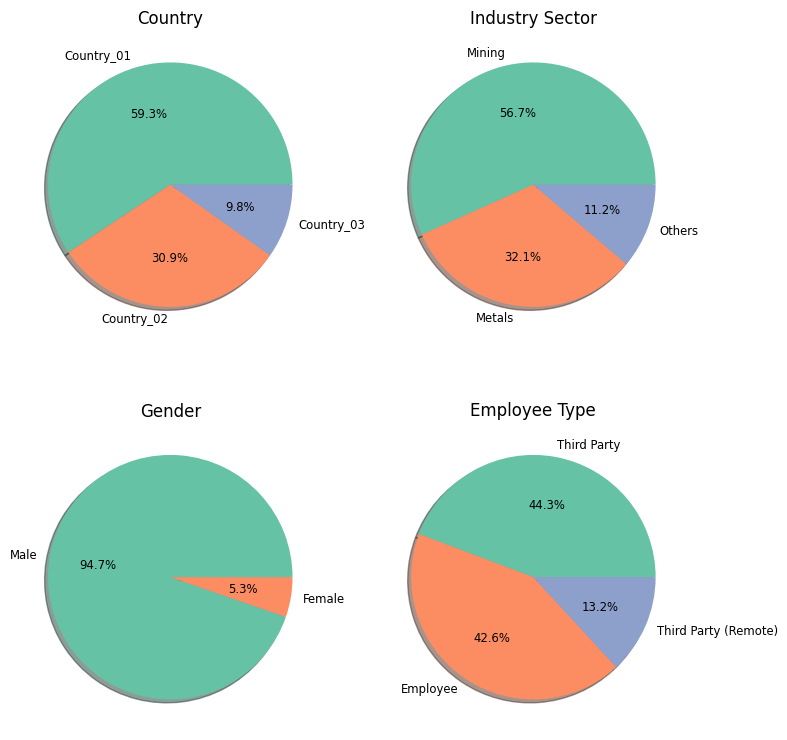

In [15]:
df_pie_chart_metrix(data)

In [16]:
fig = px.bar(data['Local'].value_counts().reset_index(), x="Local", y="count", color="Local", text_auto=True)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [17]:
fig = px.bar(data['Critical Risk'].value_counts().reset_index(), x="Critical Risk", y="count", color="Critical Risk", text_auto=True)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [18]:
fig = px.bar(data['Accident Level'].value_counts().reset_index(), x="Accident Level", y="count", color="Accident Level", text_auto=True)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

### Insights -
* Most Accident happened in Country - 01.
* Mining Industry sector is prone to the Accidents as 57% of accidents are related to Mining Industry
* Nearly 95% of the accidents were caused by Male Employeed. However as data is relaated to Mining and Metal Industry this percentage seems ok as most of workers will be Male.
* Employees on the payroll and Third Party Employee equally contributes to the number of accidents. Very few accidents were caused by the Remote Emplyees.
* 89 out of 418 accidents happened in Local-01 and local-05, local-01 and local-04 has roughly equal amount of accidents which around 55-60. Least accident happened in local-9 and local 11 which is 2.
* For more than half of the Accident the Critical Risk is mentioned as others. Which means for most of the accident critical risk involved is too large or can not be determined. Here SME can help the industry to assess the critical risk involved in the accident.
* Out of 417 accidents 316 accidents are of accident level 1 which means nearly 75% of the accidents are of least severity
* As the severity increases number of accident reduces.
* Only 8 Accident were there which were considered as most severe or fatal.
* From Machine Learning perspective clearly there is significant class imbalance in the target variable.

## BiVariate Analysis

In [19]:
def stacked_bar_chart(df,column):
  fig = px.bar(
    df.groupby(column)['Accident Level'].value_counts().reset_index(),
    x=column,
    y='count',
    color='Accident Level',
    barmode='stack',
    text_auto=True
    )
  fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
  fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
  fig.show()

In [20]:
stacked_bar_chart(data,'Country')

In [21]:
stacked_bar_chart(data,'Industry Sector')

In [22]:
stacked_bar_chart(data,'Gender')

In [23]:
stacked_bar_chart(data,'Employee Type')

### Insights -
* Most accidents belongs to Country_01 and most severe or fatal accident happned in the Country_01 only.
* As 7 out of 8 most severe accidents happened in mining industry, more stringent safety protocols needs to implemented.
* Only 1 most severe accident in metal industry and other industry sectors seems safer than Mining and Metal when it comes to the Industry Accidents.
* Most severe accidents which belongs to Accident Level 5 were caused by Male Employees.
* Employees from payroll seems to follow the saftey instruction with required diligence as most severe accidents were caused by Third Paty or Third Pary (Remote) employees.

## Time Series

In [24]:
fig = px.line(data.groupby('Year-Month')['Accident Level'].value_counts().reset_index(),
              x='Year-Month',
              y='count',
              color='Accident Level',
              text='count'
              )
fig.update_traces(textposition="bottom right")
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
#rotate x axis label
fig.update_layout(xaxis_tickangle=-45)
fig.show()

### Insights -
* The source data timeline ranges from Jan 2016 To Jul 2017.
* Majority of the accidents are of level 1.
* In the Year 2016 Number of Accidents increased till Jun 2016 and then suddenly dropped in Jul 2016.
* Maximum accidents of 30 occured in the month Jun 2016.
* Year 2017 started with 21 accident which was maximum in that year.
* In Year 2017 starting from Jan 2017 accidents dropped and again increased in the subsequent month till Jul 2017.

# Step 3: Data preprocessing

## Remove special characters

In [25]:
# defining a function to remove special characters
def remove_special_characters(text):
    # Defining the regex pattern to match non-alphanumeric characters
    pattern = '[^A-Za-z0-9]+'

    # Finding the specified pattern and replacing non-alphanumeric characters with a blank string
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text

# Applying the function to remove special characters
data['Cleaned_Description'] = data['Description'].apply(remove_special_characters)

# checking a couple of instances of cleaned data
data.loc[0:3, ['Description','Cleaned_Description']]

,Description,Cleaned_Description
0,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",While removing the drill rod of the Jumbo 08 for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo
1,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",During the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital Note of sulphide solution 48 grams liter
2,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",In the sub station MILPO located at level 170 when the collaborator was doing the excavation work with a pick hand tool hitting a rock with the flat part of the beak it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of the left foot of the collaborator causing the injury
3,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.",Being 9 45 am approximately in the Nv 1880 CX 695 OB7 the personnel begins the task of unlocking the Soquet bolts of the BHB machine when they were in the penultimate bolt they identified that the hexagonal head was worn proceeding Mr Crist bal Auxiliary assistant to climb to the platform to exert pressure with your hand on the DADO key to prevent it from coming out of the bolt in those moments two collaborators rotate with the lever in anti clockwise direction leaving the key of the bolt hitting the palm of the left hand causing the injury


## Convert the text to lower case

In [26]:
# changing the case of the text data to lower case
data['Cleaned_Description'] = data['Cleaned_Description'].str.lower()

# checking a couple of instances of cleaned data
data.loc[0:3, ['Description','Cleaned_Description']]

,Description,Cleaned_Description
0,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",while removing the drill rod of the jumbo 08 for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo
1,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",during the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital note of sulphide solution 48 grams liter
2,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",in the sub station milpo located at level 170 when the collaborator was doing the excavation work with a pick hand tool hitting a rock with the flat part of the beak it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of the left foot of the collaborator causing the injury
3,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.",being 9 45 am approximately in the nv 1880 cx 695 ob7 the personnel begins the task of unlocking the soquet bolts of the bhb machine when they were in the penultimate bolt they identified that the hexagonal head was worn proceeding mr crist bal auxiliary assistant to climb to the platform to exert pressure with your hand on the dado key to prevent it from coming out of the bolt in those moments two collaborators rotate with the lever in anti clockwise direction leaving the key of the bolt hitting the palm of the left hand causing the injury


## Remove white space


In [27]:
# removing extra whitespaces from the text
data['Cleaned_Description'] = data['Cleaned_Description'].str.strip()

# checking a couple of instances of cleaned data
data.loc[0:3, ['Description','Cleaned_Description']]

,Description,Cleaned_Description
0,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",while removing the drill rod of the jumbo 08 for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo
1,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",during the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital note of sulphide solution 48 grams liter
2,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",in the sub station milpo located at level 170 when the collaborator was doing the excavation work with a pick hand tool hitting a rock with the flat part of the beak it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of the left foot of the collaborator causing the injury
3,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.",being 9 45 am approximately in the nv 1880 cx 695 ob7 the personnel begins the task of unlocking the soquet bolts of the bhb machine when they were in the penultimate bolt they identified that the hexagonal head was worn proceeding mr crist bal auxiliary assistant to climb to the platform to exert pressure with your hand on the dado key to prevent it from coming out of the bolt in those moments two collaborators rotate with the lever in anti clockwise direction leaving the key of the bolt hitting the palm of the left hand causing the injury


## Remove Stop Words

In [28]:
# defining a function to remove stop words using the NLTK library
def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])

    return new_text

# Applying the function to remove stop words using the NLTK library
data['Cleaned_Description'] = data['Cleaned_Description'].apply(remove_stopwords)

# checking a couple of instances of cleaned data
data.loc[0:3,['Description','Cleaned_Description']]

,Description,Cleaned_Description
0,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",removing drill rod jumbo 08 maintenance supervisor proceeds loosen support intermediate centralizer facilitate removal seeing mechanic supports one end drill equipment pull hands bar accelerate removal moment bar slides point support tightens fingers mechanic drilling bar beam jumbo
1,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",activation sodium sulphide pump piping uncoupled sulfide solution designed area reach maid immediately made use emergency shower directed ambulatory doctor later hospital note sulphide solution 48 grams liter
2,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",sub station milpo located level 170 collaborator excavation work pick hand tool hitting rock flat part beak bounces hitting steel tip safety shoe metatarsal area left foot collaborator causing injury
3,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.",9 45 approximately nv 1880 cx 695 ob7 personnel begins task unlocking soquet bolts bhb machine penultimate bolt identified hexagonal head worn proceeding mr crist bal auxiliary assistant climb platform exert pressure hand dado key prevent coming bolt moments two collaborators rotate lever anti clockwise direction leaving key bolt hitting palm left hand causing injury


## Apply Lammetization

In [29]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to lemmatize text
def lemmatize_text(text):
    words = text.split()
    lemmatized = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
    return ' '.join(lemmatized)

# Apply lemmatization
data['Cleaned_Description'] = data['Cleaned_Description'].apply(lemmatize_text)

data.loc[0:3,['Description','Cleaned_Description']]

,Description,Cleaned_Description
0,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",removing drill rod jumbo 08 maintenance supervisor proceeds loosen support intermediate centralizer facilitate removal seeing mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tightens finger mechanic drilling bar beam jumbo
1,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",activation sodium sulphide pump piping uncoupled sulfide solution designed area reach maid immediately made use emergency shower directed ambulatory doctor later hospital note sulphide solution 48 gram liter
2,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",sub station milpo located level 170 collaborator excavation work pick hand tool hitting rock flat part beak bounce hitting steel tip safety shoe metatarsal area left foot collaborator causing injury
3,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.",9 45 approximately nv 1880 cx 695 ob7 personnel begin task unlocking soquet bolt bhb machine penultimate bolt identified hexagonal head worn proceeding mr crist bal auxiliary assistant climb platform exert pressure hand dado key prevent coming bolt moment two collaborator rotate lever anti clockwise direction leaving key bolt hitting palm left hand causing injury


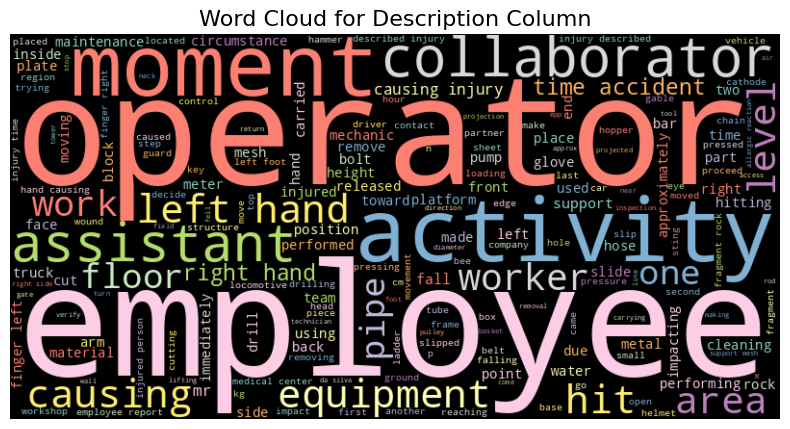

In [30]:
# Combine all descriptions into a single string
text = " ".join(data['Cleaned_Description'].astype(str))

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Set3_r').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title("Word Cloud for Description Column", fontsize=16)
plt.show()


In [31]:
# Function to generate n-gram frequency distribution per Accident Level
def ngram_freq_by_accident_level(df, column, group_col, n=2):
    grouped_ngrams = []

    # Group by 'Accident Level' and process each group
    for level, group in df.groupby(group_col):
        all_ngrams = []

        for text in group[column]:
            tokens = word_tokenize(text.lower())  # Tokenize and lowercase
            n_grams = list(ngrams(tokens, n))  # Generate n-grams
            all_ngrams.extend(n_grams)  # Collect all n-grams

        fdist = FreqDist(all_ngrams)  # Compute frequency distribution
        top_ngrams = fdist.most_common(5)  # Get top 10 n-grams

        # Store results in a structured format
        for ngram, count in top_ngrams:
            grouped_ngrams.append({'Accident Level': level, 'N-gram': ' '.join(ngram), 'Count': count})

    return pd.DataFrame(grouped_ngrams)

In [34]:
# unigrams
ngram_df = ngram_freq_by_accident_level(data, 'Cleaned_Description', 'Accident Level', n=1)

ngram_df

,Accident Level,N-gram,Count
0,I,employee,131
1,I,hand,114
2,I,causing,114
3,I,right,112
4,I,left,104
5,II,employee,23
6,II,causing,23
7,II,hand,21
8,II,right,19
9,II,left,14


In [62]:
# bigrams
ngram_df = ngram_freq_by_accident_level(data, 'Cleaned_Description', 'Accident Level', n=2)

ngram_df

,Accident Level,N-gram,Count
0,0,time accident,42
1,0,right hand,40
2,0,left hand,39
3,0,causing injury,36
4,0,employee report,20
5,1,left hand,7
6,1,right hand,7
7,1,causing injury,6
8,1,causing cut,5
9,1,finger right,4


# Data preparation

## Replace Struct

In [36]:
# Replace the Categorical Value using replace
replaceStruct = {
                "Country":     {"Country_01": 1, "Country_02": 2 ,"Country_03": 3},
                "Local": {"Local_01": 1, "Local_02":2 , "Local_03": 3, "Local_04": 4, "Local_05": 5, "Local_06": 6, "Local_07": 7, "Local_08": 8, "Local_09": 9, "Local_10": 10, "Local_11": 11, "Local_12": 12},
                 "Industry Sector": {"Mining": 1, "Metals":2 , "Others": 3},
                 "Accident Level":     {"I": 0, "II": 1 ,"III": 2 ,"IV": 3 ,"V": 4},
                "Gender":     {"Male": 1, "Female": 2 },
                "Employee Type":     {"Employee": 1, "Third Party": 2, "Third Party (Remote)": 3 },
                    }

data=data.replace(replaceStruct)

data.head(3)

<ipython-input-36-6ac112d9ef95>:11: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Date,Country,Local,Industry Sector,Accident Level,Gender,Employee Type,Critical Risk,Description,Year,Month,Day,Year-Month,Cleaned_Description
0,2016-01-01,1,1,1,0,1,2,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",2016,1,1,2016-01,removing drill rod jumbo 08 maintenance supervisor proceeds loosen support intermediate centralizer facilitate removal seeing mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tightens finger mechanic drilling bar beam jumbo
1,2016-01-02,2,2,1,0,1,1,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",2016,1,2,2016-01,activation sodium sulphide pump piping uncoupled sulfide solution designed area reach maid immediately made use emergency shower directed ambulatory doctor later hospital note sulphide solution 48 gram liter
2,2016-01-06,1,3,1,0,1,3,Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",2016,1,6,2016-01,sub station milpo located level 170 collaborator excavation work pick hand tool hitting rock flat part beak bounce hitting steel tip safety shoe metatarsal area left foot collaborator causing injury


## One Hot Encoding

In [37]:
# apply one hot encoding to critical risk feature
oneHotCols=["Critical Risk"]

one_hot_encoded_df = pd.get_dummies(data, columns=['Critical Risk'], dtype='int')

one_hot_encoded_df.shape

(418, 46)

In [38]:
# Drop Description and Cleaned Description columns and Date column
one_hot_encoded_df.drop(['Description', 'Cleaned_Description', 'Date','Year-Month'], axis=1, inplace=True)
one_hot_encoded_df.head(3)

,Country,Local,Industry Sector,Accident Level,Gender,Employee Type,Year,Month,Day,Critical Risk_\nNot applicable,...,Critical Risk_Projection,Critical Risk_Projection of fragments,Critical Risk_Projection/Burning,Critical Risk_Projection/Choco,Critical Risk_Projection/Manual Tools,Critical Risk_Suspended Loads,Critical Risk_Traffic,Critical Risk_Vehicles and Mobile Equipment,Critical Risk_Venomous Animals,Critical Risk_remains of choco
0,1,1,1,0,1,2,2016,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,1,0,1,1,2016,1,2,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,1,0,1,3,2016,1,6,0,...,0,0,0,0,0,0,0,0,0,0


## Bag of Words

In [39]:
# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features = 50)

# Fit and transform the text data
bow_matrix = vectorizer.fit_transform(data['Cleaned_Description'])

# Convert the result into a DataFrame for better readability
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

bow_df.shape

(418, 50)

In [40]:
Cleaned_df_bow = pd.concat([one_hot_encoded_df, bow_df], axis=1)
Cleaned_df_bow.head(3)

,Country,Local,Industry Sector,Accident Level,Gender,Employee Type,Year,Month,Day,Critical Risk_\nNot applicable,...,rock,safety,side,support,team,time,truck,used,work,worker
0,1,1,1,0,1,2,2016,1,1,0,...,0,0,0,3,0,0,0,0,0,0
1,2,2,1,0,1,1,2016,1,2,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,1,0,1,3,2016,1,6,0,...,1,1,0,0,0,0,0,0,1,0


In [41]:
#store data to csv
path_to_store_data = '/content/drive/MyDrive/PGP AIML/Capstone Project/Cleaned_df_bow.csv'
Cleaned_df_bow.to_csv(path_to_store_data)

## TF-IDF

In [42]:
tfidf_df = pd.DataFrame()
for i in [1,2,3]:
    vec_tfidf = TfidfVectorizer(max_features=50, norm='l2', stop_words='english', lowercase=True, use_idf=True, ngram_range=(i,i))
    X = vec_tfidf.fit_transform(data['Cleaned_Description']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in vec_tfidf.get_feature_names_out()])
    tfidf_df = pd.concat([tfidf_df.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)

tfidf_df.shape


(418, 150)

In [43]:
Cleaned_df_tfidf = pd.concat([one_hot_encoded_df, tfidf_df], axis=1)
Cleaned_df_tfidf.head(3)

,Country,Local,Industry Sector,Accident Level,Gender,Employee Type,Year,Month,Day,Critical Risk_\nNot applicable,...,TFIDF_time accident employee,TFIDF_time accident operator,TFIDF_time accident worker,TFIDF_time fragment rock,TFIDF_type allergic reaction,TFIDF_used safety glass,TFIDF_verified type allergic,TFIDF_wearing glove enter,TFIDF_wearing safety glove,TFIDF_worker wearing safety
0,1,1,1,0,1,2,2016,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2,1,0,1,1,2016,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,1,0,1,3,2016,1,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
#store data to csv
path_to_store_data = '/content/drive/MyDrive/PGP AIML/Capstone Project/Cleaned_df_tfidf.csv'
Cleaned_df_bow.to_csv(path_to_store_data)

## PCA on BOW

In [45]:
# apply z-score on Year, Month and Day column
from scipy.stats import zscore

# Apply Z-score
Cleaned_df_bow['Year'] = Cleaned_df_bow['Year'].transform(zscore)
Cleaned_df_bow['Month'] = Cleaned_df_bow['Year'].transform(zscore)
Cleaned_df_bow['Day'] = Cleaned_df_bow['Year'].transform(zscore)

Cleaned_df_bow.head(5)

,Country,Local,Industry Sector,Accident Level,Gender,Employee Type,Year,Month,Day,Critical Risk_\nNot applicable,...,rock,safety,side,support,team,time,truck,used,work,worker
0,1,1,1,0,1,2,-0.690675,-0.690675,-0.690675,0,...,0,0,0,3,0,0,0,0,0,0
1,2,2,1,0,1,1,-0.690675,-0.690675,-0.690675,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,1,0,1,3,-0.690675,-0.690675,-0.690675,0,...,1,1,0,0,0,0,0,0,1,0
3,1,4,1,0,1,2,-0.690675,-0.690675,-0.690675,0,...,0,0,0,0,0,0,0,0,0,0
4,1,4,1,3,1,2,-0.690675,-0.690675,-0.690675,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
X_bow = Cleaned_df_bow.drop('Accident Level', axis=1)
y_bow = Cleaned_df_bow['Accident Level']

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y_bow, test_size=0.2, random_state=42)

In [47]:
print(X_train_bow.shape)
print(X_test_bow.shape)
print(y_train_bow.shape)
print(y_test_bow.shape)

(334, 91)
(84, 91)
(334,)
(84,)


In [48]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_bow, y_train_bow = smote.fit_resample(X_train_bow, y_train_bow)

In [49]:
pca_bow = PCA(n_components=0.95)
pc_bow = pca_bow.fit_transform(X_train_bow)
cum_var = pca_bow.explained_variance_ratio_.cumsum()
print(cum_var)

[0.38542136 0.59017977 0.63447982 0.66488637 0.68937339 0.71165822
 0.73264312 0.75075128 0.76622827 0.78080224 0.79231339 0.80304022
 0.81342989 0.82367598 0.83345862 0.8417122  0.84956725 0.85729401
 0.86445537 0.87123555 0.87781649 0.88422172 0.89021725 0.89595057
 0.90144953 0.90647087 0.91140248 0.91616952 0.92056954 0.92485409
 0.92906139 0.93309904 0.93680706 0.94046565 0.94405772 0.94743527
 0.95061159]


In [50]:
pc_list_bow = ['pc'+str(i) for i in range(1,38)]
print(pc_list_bow)

X_train_pc_bow = pd.DataFrame(pc_bow, columns = pc_list_bow)
X_train_pc_bow.head()

['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19', 'pc20', 'pc21', 'pc22', 'pc23', 'pc24', 'pc25', 'pc26', 'pc27', 'pc28', 'pc29', 'pc30', 'pc31', 'pc32', 'pc33', 'pc34', 'pc35', 'pc36', 'pc37']


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37
0,-3.196511,2.000191,-0.613413,0.720811,0.378406,-0.027855,-0.265715,0.108880,0.396983,-1.020029,...,-0.252995,0.177816,-0.063702,-0.075514,-0.440517,0.014430,-0.175131,-0.394010,-0.154029,0.052570
1,-1.180500,-1.959356,0.893108,2.320017,-1.559001,-0.276860,0.047064,-0.119088,-0.052163,-0.454026,...,0.678195,1.638745,-0.020746,-0.285303,-0.583947,0.444129,-0.201880,0.050195,0.137252,-0.989412
2,-1.095525,-1.613808,0.435671,0.479634,-0.426385,-0.029687,0.601997,-0.996111,-0.253139,0.578809,...,-0.085844,-0.001492,0.062588,-0.100948,-0.110360,0.139719,0.507737,-0.289369,0.229151,0.368105
3,-0.332344,1.892048,-0.300961,0.984427,-1.104631,0.074976,-0.354534,0.546225,-0.558701,-1.254204,...,-0.208782,0.116629,0.258920,0.077579,-0.200996,-0.078792,-0.172386,-0.411788,-0.499524,0.409916
4,3.985057,2.629459,-0.298059,0.830239,0.968710,-0.356313,0.966717,-0.209041,-0.129740,0.075369,...,-0.391046,-0.161782,-0.155759,0.024989,0.271179,-0.283029,-0.212564,0.258161,-0.098802,-0.289807


In [51]:
X_test_pca_bow = pca_bow.transform(X_test_bow)

X_test_pc_bow = pd.DataFrame(X_test_pca_bow, columns = pc_list_bow)
X_test_pc_bow.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37
0,1.713246,2.280777,0.534838,1.759493,-0.061408,-0.374432,2.065482,1.444803,0.412630,-0.550552,...,-0.364038,0.535122,0.038445,-0.164627,1.324346,-0.307587,0.084548,0.016343,0.115503,-0.477589
1,1.128815,2.305861,-0.288704,0.306983,-0.094016,-1.078010,-0.974129,0.562492,-0.389206,0.059101,...,-0.114211,0.190449,0.060361,-0.136881,-0.127433,-0.147685,0.188182,-0.630023,-0.152001,0.238242
2,1.750915,2.388823,0.201966,0.397276,-0.323143,-0.005891,1.023310,0.581912,-0.763643,-0.499535,...,0.441817,0.237085,-0.095893,-0.357437,0.315269,-0.077361,0.014951,0.051518,-0.036388,-0.138338
3,-1.035576,-1.636381,0.938276,0.199869,-0.191671,0.758918,-0.957413,0.080861,-0.184645,-0.910920,...,0.155052,-0.345480,-0.193956,-0.060768,0.635677,-0.642277,0.264887,0.376915,-0.102108,0.221109
4,4.157186,-0.777519,2.516984,-1.195232,0.611373,0.149342,-1.023958,-0.140686,0.496343,0.391473,...,-0.391963,-0.053519,-0.204578,-0.064279,0.111146,-0.264089,0.281835,-0.169509,0.143264,-0.060354


## PCA on TF-IDF

In [52]:
X_tfidf = Cleaned_df_tfidf.drop('Accident Level', axis=1)
y_tfidf = Cleaned_df_tfidf['Accident Level']

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=42)

In [53]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)
print(y_train_tfidf.shape)
print(y_test_tfidf.shape)

(334, 191)
(84, 191)
(334,)
(84,)


In [54]:
# apply z-score on Year, Month and Day column
from scipy.stats import zscore

# Apply Z-score
X_train_tfidf['Year'] = X_train_tfidf['Year'].transform(zscore)
X_train_tfidf['Month'] = X_train_tfidf['Year'].transform(zscore)
X_train_tfidf['Day'] = X_train_tfidf['Year'].transform(zscore)

X_train_bow.head(5)

,Country,Local,Industry Sector,Gender,Employee Type,Year,Month,Day,Critical Risk_\nNot applicable,Critical Risk_Bees,...,rock,safety,side,support,team,time,truck,used,work,worker
0,1,1,1,1,2,1.447859,1.447859,1.447859,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,3,1,1,1,-0.690675,-0.690675,-0.690675,0,0,...,2,0,0,1,0,2,0,0,1,1
2,1,3,1,1,2,-0.690675,-0.690675,-0.690675,0,0,...,0,1,0,0,0,1,0,0,0,1
3,1,4,1,1,1,1.447859,1.447859,1.447859,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2,8,2,1,3,1.447859,1.447859,1.447859,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
pca_tfidf = PCA(n_components=0.90)
principal_components_tfidf = pca_tfidf.fit_transform(X_train_tfidf)
cum_var = pca_tfidf.explained_variance_ratio_.cumsum()
print(cum_var)

[0.57089161 0.77676959 0.80966639 0.82966547 0.84315829 0.85072304
 0.8570303  0.86325318 0.86836909 0.87268888 0.87666237 0.88056207
 0.8841379  0.88740566 0.89041031 0.89326171 0.89607554 0.89875372
 0.90137085]


In [56]:
pc_list_tfidf = ['pc'+str(i) for i in range(1,20)]
print(pc_list_tfidf)

['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19']


In [57]:
X_train_pc_tfidf = pd.DataFrame(principal_components_tfidf, columns = pc_list_tfidf)
X_train_pc_tfidf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19
0,-3.561147,2.907287,0.209217,0.365588,-0.232460,-0.208860,-0.009338,-0.259516,-0.028193,-0.029073,0.198901,-0.411927,0.180349,0.044823,0.172669,-0.564409,0.037627,0.000304,-0.256828
1,-1.964941,-1.116549,-0.761043,-0.260408,0.117272,0.206332,0.160505,0.052249,-0.125448,-0.074596,0.306008,0.205259,0.122129,0.046307,0.046707,-0.077983,0.209052,-0.011515,-0.073981
2,-1.978974,-1.075461,0.217512,-0.457420,0.193267,-0.194384,-0.015270,0.153981,-0.058237,0.129884,0.051784,0.426216,0.002932,-0.297571,-0.354268,-0.189160,-0.329144,0.353491,-0.081201
3,-0.740967,2.511094,-0.960906,-0.710298,0.428081,0.100822,-0.130458,-0.265807,-0.005855,-0.138817,0.294283,-0.397300,0.604156,0.041293,-0.085511,-0.200278,0.250518,0.318005,0.116417
4,3.526982,2.417851,1.220369,-0.284182,-0.175286,0.375914,-0.011473,-0.140890,0.004244,0.825651,-0.348872,0.084148,0.135179,-0.318636,-0.112181,0.052525,0.107567,-0.067958,0.005316


In [58]:
X_test_pca_tfidf = pca_tfidf.transform(X_test_tfidf)

X_test_pc_tfidf = pd.DataFrame(X_test_pca_tfidf, columns = pc_list_tfidf)
X_test_pc_tfidf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19
0,82.587769,1155.123065,-51.800727,-59.822345,105.300443,3.641654,21.626874,42.686166,16.757204,-3.118082,13.105112,-5.080460,12.246293,-1.432875,-13.214290,5.171179,28.430777,12.671264,24.177157
1,82.049189,1157.958975,-53.828951,-58.648108,106.395883,3.025709,21.384814,42.414553,16.756508,-2.965421,12.665382,-4.808296,12.734557,-1.470197,-13.513612,4.524848,28.091023,12.140531,24.356707
2,83.133148,1162.509096,-53.146767,-60.109699,105.938476,3.278455,21.655761,43.026670,16.768822,-2.421843,12.511451,-5.142097,12.720228,-1.571472,-13.457736,4.596968,28.428888,11.958320,24.481276
3,79.679679,1158.018783,-54.051152,-59.796693,106.798994,3.127514,21.453764,42.189550,16.663420,-2.966742,12.577069,-4.977174,12.738413,-1.490205,-13.356364,4.649884,28.204789,12.415535,24.324918
4,85.186292,1161.735971,-54.079237,-59.658377,106.638470,3.080293,21.509825,42.278761,16.646433,-2.955026,12.486093,-4.727016,12.331493,-1.624516,-13.318668,4.586150,28.232000,12.367371,24.398634


# ML Models

In [59]:
# Defining a function which quickly test the fit of 6 different models on the dataset
def ml_models(X_train , y_train, X_test, y_test):

    # creating a dictionary with different ML models
    models = {
        'LogReg': LogisticRegression(),
        'Naive Bayes': GaussianNB(),
        'KNN': KNeighborsClassifier(),
        'SVM': SVC(),
        'Decision Tree': DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=100,min_samples_leaf=5),
        'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=7),
        'Bagging': BaggingClassifier(n_estimators=50, max_samples=.7),
        'AdaBoost': AdaBoostClassifier(n_estimators= 50),
        'Gradient Boost': GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05),
        'XGBoost': XGBClassifier()
    }

    names = []
    accuracy_train = []
    accuracy_test = []
    recall_train = []
    recall_test = []
    precision_train = []
    precision_test = []
    f1_train = []
    f1_test = []

    for name, model in models.items(): # Looping through each and every model
        clf = model.fit(X_train, y_train) # Fit the models one by one

        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)

        names.append(name)

        accuracy_train.append(accuracy_score(y_train,y_train_pred))
        accuracy_test.append(accuracy_score(y_test,y_test_pred))
        recall_train.append(recall_score(y_train,y_train_pred,average='weighted'))
        recall_test.append(recall_score(y_test,y_test_pred,average='weighted'))
        precision_train.append(precision_score(y_train,y_train_pred,average='weighted'))
        precision_test.append(precision_score(y_test,y_test_pred,average='weighted'))
        f1_train.append(f1_score(y_train,y_train_pred,average='weighted'))
        f1_test.append(f1_score(y_test,y_test_pred,average='weighted'))

        result_df =  pd.DataFrame({'model': names,
                                   'accuracy train': accuracy_train,
                                   'accuracy test': accuracy_test,
                                   'recall train': recall_train,
                                   'recall test': recall_test,
                                   'precision train': precision_train,
                                   'precision test': precision_test,
                                   'f1 train': f1_train,
                                   'f1 test': f1_test,
                                   }) # Creating the dataframe using the model scores

    return result_df # Returns the dataframe

## BOW

In [60]:
ml_models(X_train_pc_bow , y_train_bow, X_test_pc_bow, y_test_bow)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,model,accuracy train,accuracy test,recall train,recall test,precision train,precision test,f1 train,f1 test
0,LogReg,0.765854,0.476190,0.765854,0.476190,0.762755,0.567760,0.762716,0.517916
1,Naive Bayes,0.652033,0.595238,0.652033,0.595238,0.655418,0.565174,0.645921,0.579274
2,KNN,0.871545,0.250000,0.871545,0.250000,0.881771,0.532921,0.864235,0.322838
3,SVM,0.916260,0.607143,0.916260,0.607143,0.916139,0.546429,0.915845,0.575188
4,Decision Tree,0.740650,0.416667,0.740650,0.416667,0.748707,0.535714,0.740679,0.468750
5,RandomForest,0.967480,0.666667,0.967480,0.666667,0.968187,0.645445,0.967491,0.644048
6,Bagging,0.990244,0.619048,0.990244,0.619048,0.990279,0.582090,0.990232,0.600000
7,AdaBoost,0.697561,0.464286,0.697561,0.464286,0.704937,0.522321,0.699118,0.491597
8,Gradient Boost,0.918699,0.535714,0.918699,0.535714,0.918527,0.572034,0.918401,0.553279
9,XGBoost,0.992683,0.654762,0.992683,0.654762,0.992747,0.580986,0.992681,0.615672


## TF-IDF

### Random Forrest

In [61]:
ml_models(X_train_pc_tfidf , y_train_tfidf, X_test_pc_tfidf, y_test_tfidf)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

,model,accuracy train,accuracy test,recall train,recall test,precision train,precision test,f1 train,f1 test
0,LogReg,0.745509,0.023810,0.745509,0.023810,0.657153,0.000567,0.655539,0.001107
1,Naive Bayes,0.679641,0.095238,0.679641,0.095238,0.672035,0.009070,0.674606,0.016563
2,KNN,0.751497,0.750000,0.751497,0.750000,0.693020,0.562500,0.686990,0.642857
3,SVM,0.736527,0.750000,0.736527,0.750000,0.542472,0.562500,0.624778,0.642857
4,Decision Tree,0.808383,0.750000,0.808383,0.750000,0.791656,0.562500,0.763562,0.642857
5,RandomForest,0.856287,0.083333,0.856287,0.083333,0.876218,0.006944,0.834025,0.012821
6,Bagging,0.967066,0.083333,0.967066,0.083333,0.967578,0.006944,0.965251,0.012821
7,AdaBoost,0.742515,0.047619,0.742515,0.047619,0.685317,0.002268,0.678164,0.004329
8,Gradient Boost,0.901198,0.047619,0.901198,0.047619,0.908478,0.002268,0.891561,0.004329
9,XGBoost,0.994012,0.750000,0.994012,0.750000,0.994115,0.562500,0.993977,0.642857
